In [1]:
%pwd

'd:\\work\\.ghorai\\Repository\\pygeoml\\notebooks\\feature_selection'

In [2]:
import os

os.chdir('../')
os.chdir('../')

%pwd

'd:\\work\\.ghorai\\Repository\\pygeoml'

In [3]:
import sys
sys.path.append('src')
%pwd

'd:\\work\\.ghorai\\Repository\\pygeoml'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from feature_selection.config import ConfigManager

config = ConfigManager()

diconfig = config.get_dataingestion_config()

DATA_PATH = diconfig.data_file


[2023-12-26 19:29:06,594: INFO: utils]: yaml file: config.yaml loaded successfully
[2023-12-26 19:29:06,603: INFO: utils]: yaml file: params.yaml loaded successfully
[2023-12-26 19:29:06,605: INFO: utils]: create directory at: artifacts
[2023-12-26 19:29:06,607: INFO: utils]: create directory at: artifacts/data_ingestion


In [5]:
df = pd.read_csv(DATA_PATH)
df

,prviSum1,prviMax1,prviMin1,prviRMS1,prviAvg1,prviMed1,prviMod1,prviVar1,prviSTD1,rfdiSum1,...,vvbyvhMod1,vvbyvhVar1,vvbyvhSTD1,gridid,geomid,pixid,crop_season,crop_year,class_name,class_id
0,-58.198951,-9.429493,-12.379228,11.693395,-11.639790,-12.066415,-12.38,1.563465,1.118379,-1.967448,...,0.49,0.000296,0.015400,108781,old_84,2932,Kharif,2022,Maize,2
1,-56.698642,-9.227584,-12.241389,11.396103,-11.339728,-11.864143,-12.24,1.602157,1.132133,-1.967382,...,0.53,0.001443,0.033972,108781,old_84,2933,Kharif,2022,Maize,2
2,-62.978038,-12.056596,-12.849531,12.598672,-12.595608,-12.716180,-12.72,0.096504,0.277855,-2.224911,...,0.42,0.001286,0.032078,108781,old_84,2935,Kharif,2022,Maize,2
3,-67.500282,-13.181876,-13.900732,13.504049,-13.500056,-13.258470,-13.90,0.134762,0.328344,-2.200395,...,0.42,0.005622,0.067064,108781,old_84,2938,Kharif,2022,Maize,2
4,-59.906036,-9.201530,-13.107331,12.067735,-11.981207,-12.280681,-13.11,2.601141,1.442537,-2.287368,...,0.40,0.000154,0.011114,108781,old_84,2939,Kharif,2022,Maize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14565,-111.250718,-10.480867,-11.490369,11.129939,-11.125072,-11.185350,-11.16,0.120351,0.329114,-5.790163,...,0.36,0.003662,0.057407,124105,new_31,3475,Kharif,2023,Settlement,40
14566,-106.638318,-10.061942,-11.087704,10.668929,-10.663832,-10.637803,-11.09,0.120826,0.329763,-5.177473,...,0.38,0.002837,0.050533,124105,new_31,3476,Kharif,2023,Settlement,40
14567,-115.009725,-10.541628,-12.155942,11.511776,-11.500973,-11.590680,-11.63,0.276233,0.498608,-6.038113,...,0.36,0.006662,0.077434,124105,new_31,3478,Kharif,2023,Settlement,40
14568,-109.626534,-10.339361,-11.356680,10.967731,-10.962653,-10.997125,-10.86,0.123729,0.333701,-5.488904,...,0.42,0.005569,0.070796,124105,new_31,3479,Kharif,2023,Settlement,40


In [6]:
unique_class = list(df['class_name'].unique())
print(f"Unique classes in dataset: \n{unique_class}")

Unique classes in dataset: 
['Maize', 'Soyabean', 'Bajra', 'Groundnut', 'Paddy', 'Cotton', 'Forest', 'Water', 'Open', 'Settlement']


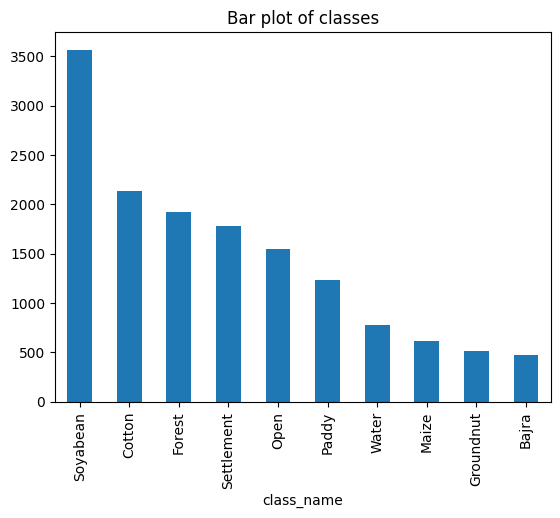

In [7]:
# barplot
df['class_name'].value_counts().plot(kind='bar')
plt.title('Bar plot of classes')
plt.show()

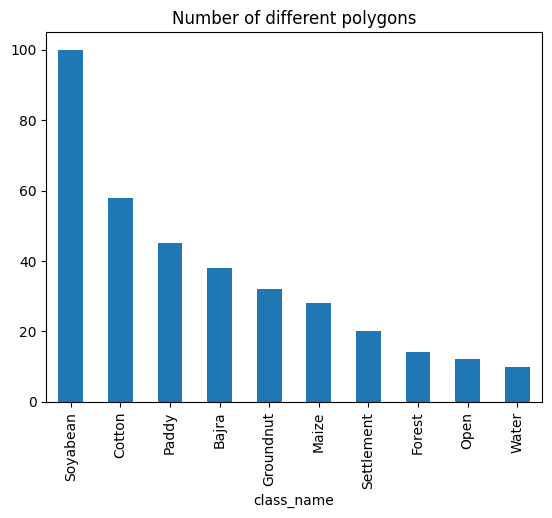

In [8]:
# geometry counts
df.groupby('class_name')['geomid'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.title("Number of different polygons")
plt.show()

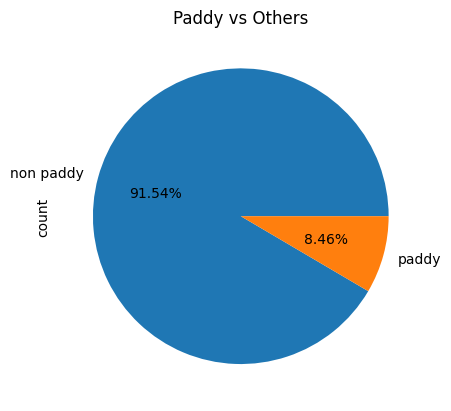

In [9]:
# paddy vs others
df['class_name'].apply(lambda x: 'paddy' if 'paddy' in x.lower() else 'non paddy').value_counts().plot.pie(legend=False, autopct='%1.2f%%')
plt.title("Paddy vs Others")
plt.show()


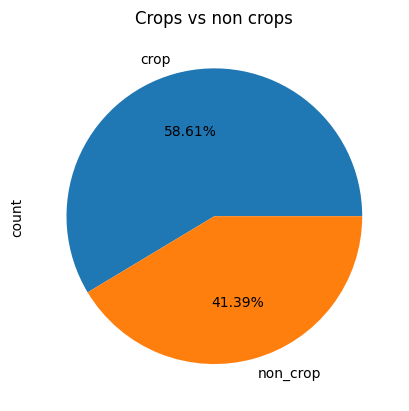

In [10]:
CROP_CLASSES = ['Maize', 'Soyabean', 'Bajra', 'Groundnut', 'Paddy', 'Cotton']
df['class_name'].apply(lambda x: 'crop' if x in CROP_CLASSES else 'non_crop').value_counts().plot.pie(legend=False, autopct='%1.2f%%')
plt.title("Crops vs non crops")
plt.show()

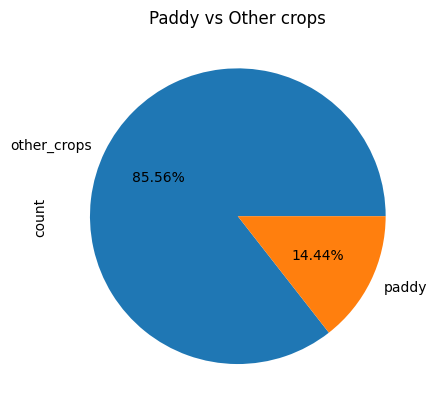

In [11]:
# paddy vs other-crops
df[df['class_name'].apply(lambda x: x in CROP_CLASSES)]['class_name']\
    .apply(lambda x: 'paddy' if 'paddy' in x.lower() else 'other_crops').value_counts().plot.pie(legend=False, autopct='%1.2f%%')
plt.title("Paddy vs Other crops")
plt.show()